In [1]:
import numpy as np
import pandas as pd
import sklearn
import nltk
# from nltk.stem.porter import PorterStemmer
nltk.download('punkt')
from sklearn import feature_extraction,model_selection
from sklearn.metrics import confusion_matrix
import glob
import os
import string
import tensorflow as tf
import keras as K
import zipfile
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Using TensorFlow backend.


In [0]:
def load_csv(path):
  df=pd.read_csv(path).drop(['Sub-task A','ID'],axis=1)
  df=df[(df['Sub-task B']=="NGEN")|(df['Sub-task B']=='GEN')].dropna()
  df['Sub-task B'] = df['Sub-task B'].map({'NGEN': 0, 'GEN': 1})
  return df

In [3]:
train_df=load_csv("/content/drive/My Drive/iben_train.csv")
dev_df=load_csv("/content/drive/My Drive/iben_dev.csv")
print(train_df.head())
print(dev_df.head())

                                                Text  Sub-task B
0                                      Dada taratari           0
1                              Tumi korbe Amar sathe           0
2  Ar ta chara a sob bessha peter cheleder okhan ...           1
3                   কাকের শরীরে ময়ুরের পাখা লাগিয়েছে           0
4  পতিতাদের চরিত্র রাজনৈতিক নেতাদের থেকে হাজার গু...           0
                                                Text  Sub-task B
0  Ek dom sothik kotha bolecho jhekane theka uthe...           0
1                                        ফালতু মেয়ে           0
2                                   DARUN AKDOM THIK           0
3                                     Sala ranu magi           1
4                                থামবেল ঠিককোরে বানা           0


In [4]:
train_df.shape,dev_df.shape

((3826, 2), (957, 2))

In [5]:
print(train_df['Sub-task B'].value_counts())
print(dev_df['Sub-task B'].value_counts())

0    3114
1     712
Name: Sub-task B, dtype: int64
0    766
1    191
Name: Sub-task B, dtype: int64


In [6]:
from keras.preprocessing.text import one_hot
vocab_size = 4000000
# encode full sentence into vector
encoded_docs=[one_hot(d,vocab_size) for d in train_df['Text']]
print (encoded_docs)
encoded_docs2=[one_hot(d,vocab_size) for d in dev_df['Text']]
print (encoded_docs2)

[[292209, 1391723], [2030138, 3896118, 2418140, 250536], [886132, 1820084, 1034024, 1833401, 943508, 629538, 359702, 2930513, 3083629, 721639, 3192341, 1847788], [3508662, 2610499, 692992, 471756, 2021933], [1287784, 3967753, 1179473, 1284832, 2757462, 860531, 375851, 2917649, 1848509, 2253039, 193110, 1158694, 1848509, 3600031, 1766899, 3195807, 1393003, 1848509, 2253039, 2539352, 67769, 839278, 1848509], [1447747, 979219, 599461], [2939031, 3880686, 3880686, 1136064], [2941517], [2300206, 1874625, 2349353, 458572, 368617], [1861705, 3554574, 591717, 2030067, 2970589], [3348599, 3462620, 2264132, 3798752, 325370, 3842826, 3493220, 1814949, 209336, 2459111, 2434823, 3470084], [2739618, 1109257, 3343231, 1023960], [191242, 3570392], [3499210, 3948068, 1497364, 2282439, 3205832, 690127, 929698, 818083, 1497364, 692259, 3094515, 3278208, 766918, 2040415, 2096884, 2113728, 3803543, 1178967, 2087795, 53256, 1189032, 1833401, 1693907, 1384147, 3576785, 3205832, 2256668, 3280874, 3074131], [2

In [7]:
# pad documents to a max length of 4 words
max_length = 100
X_train = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(X_train)
X_test = pad_sequences(encoded_docs2, maxlen=max_length, padding='post')
print(X_test)

[[ 292209 1391723       0 ...       0       0       0]
 [2030138 3896118 2418140 ...       0       0       0]
 [ 886132 1820084 1034024 ...       0       0       0]
 ...
 [1178967 2150645 1952364 ...       0       0       0]
 [ 721349 3948068       0 ...       0       0       0]
 [ 942021 1745088 3435968 ...       0       0       0]]
[[2296316 1062664  572358 ...       0       0       0]
 [3010651 1584542       0 ...       0       0       0]
 [1134991 3507511 1447747 ...       0       0       0]
 ...
 [2739618 1819663  647714 ...       0       0       0]
 [2609431 2081628       0 ...       0       0       0]
 [ 292209 1978456  762248 ...       0       0       0]]


In [8]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(np.asarray(train_df['Sub-task B']))
y_test = to_categorical(np.asarray(dev_df['Sub-task B']))
# y_train=np.array(train_df['Sub-task A'])
# y_dev=np.array(dev_df['Sub-task A'])
print(y_train.shape, y_test.shape)

(3826, 2) (957, 2)


In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D
from keras.utils.vis_utils import plot_model
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(Conv1D(filters = 128,kernel_size=3, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation = 'softmax'))
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 8)            32000000  
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 98, 128)           3200      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 19, 128)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 19, 128)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2432)              0         
____________________________________

In [10]:
history=model.fit(X_train, y_train, validation_data = (X_test, y_test),epochs=100,batch_size=100, verbose=2)




Train on 3826 samples, validate on 957 samples
Epoch 1/100





 - 15s - loss: 0.5037 - acc: 0.8087 - val_loss: 0.5014 - val_acc: 0.8004
Epoch 2/100
 - 1s - loss: 0.4677 - acc: 0.8139 - val_loss: 0.4758 - val_acc: 0.8004
Epoch 3/100
 - 1s - loss: 0.3956 - acc: 0.8139 - val_loss: 0.4358 - val_acc: 0.8004
Epoch 4/100
 - 1s - loss: 0.2722 - acc: 0.8714 - val_loss: 0.5008 - val_acc: 0.8056
Epoch 5/100
 - 1s - loss: 0.1590 - acc: 0.9506 - val_loss: 0.5830 - val_acc: 0.7701
Epoch 6/100
 - 1s - loss: 0.0849 - acc: 0.9744 - val_loss: 0.6980 - val_acc: 0.7764
Epoch 7/100
 - 1s - loss: 0.0560 - acc: 0.9835 - val_loss: 0.7955 - val_acc: 0.7659
Epoch 8/100
 - 1s - loss: 0.0404 - acc: 0.9875 - val_loss: 0.8777 - val_acc: 0.7597
Epoch 9/100
 - 1s - loss: 0.0316 - acc: 0.9909 - val_loss: 0.9426 - val_acc: 0.7701
Epoch 10/100
 - 1s - loss: 0.0229 - acc: 0.9935 - val_loss: 0.9824 - val_acc: 0.7764
Epoch 11/100
 - 1s - loss: 0.0214 - acc: 0.9940 - val_loss: 1.0167 - val_acc: 0.7743
Epoch 12/100
 - 1s

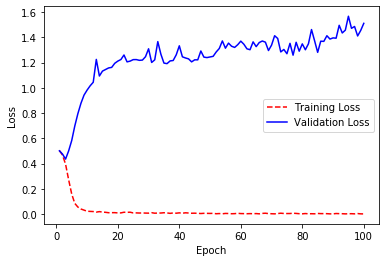

In [11]:
training_loss=history.history['loss']
validation_loss=history.history['val_loss']
epoch_count=range(1,len(training_loss)+1)
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, validation_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [12]:
scores = model.evaluate(X_test, y_test, verbose=0)
print(scores)

[1.511312954540412, 0.7951933119987121]


In [13]:
predictions_test = model.predict(X_test)
print(predictions_test)

[[1.0000000e+00 3.8220729e-24]
 [9.7237915e-01 2.7620830e-02]
 [1.0000000e+00 1.0813595e-10]
 ...
 [1.0000000e+00 2.1104318e-12]
 [9.4470400e-01 5.5295952e-02]
 [9.9583852e-01 4.1614394e-03]]


In [0]:
predictions_test1 = np.zeros_like(predictions_test)
predictions_test1[np.arange(len(predictions_test)), predictions_test.argmax(1)] = 1

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_test1))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       766
           1       0.49      0.59      0.54       191

   micro avg       0.80      0.80      0.80       957
   macro avg       0.69      0.72      0.70       957
weighted avg       0.81      0.80      0.80       957
 samples avg       0.80      0.80      0.80       957

